<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/perceptron_logistic_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-2e2a3ab66db7>:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


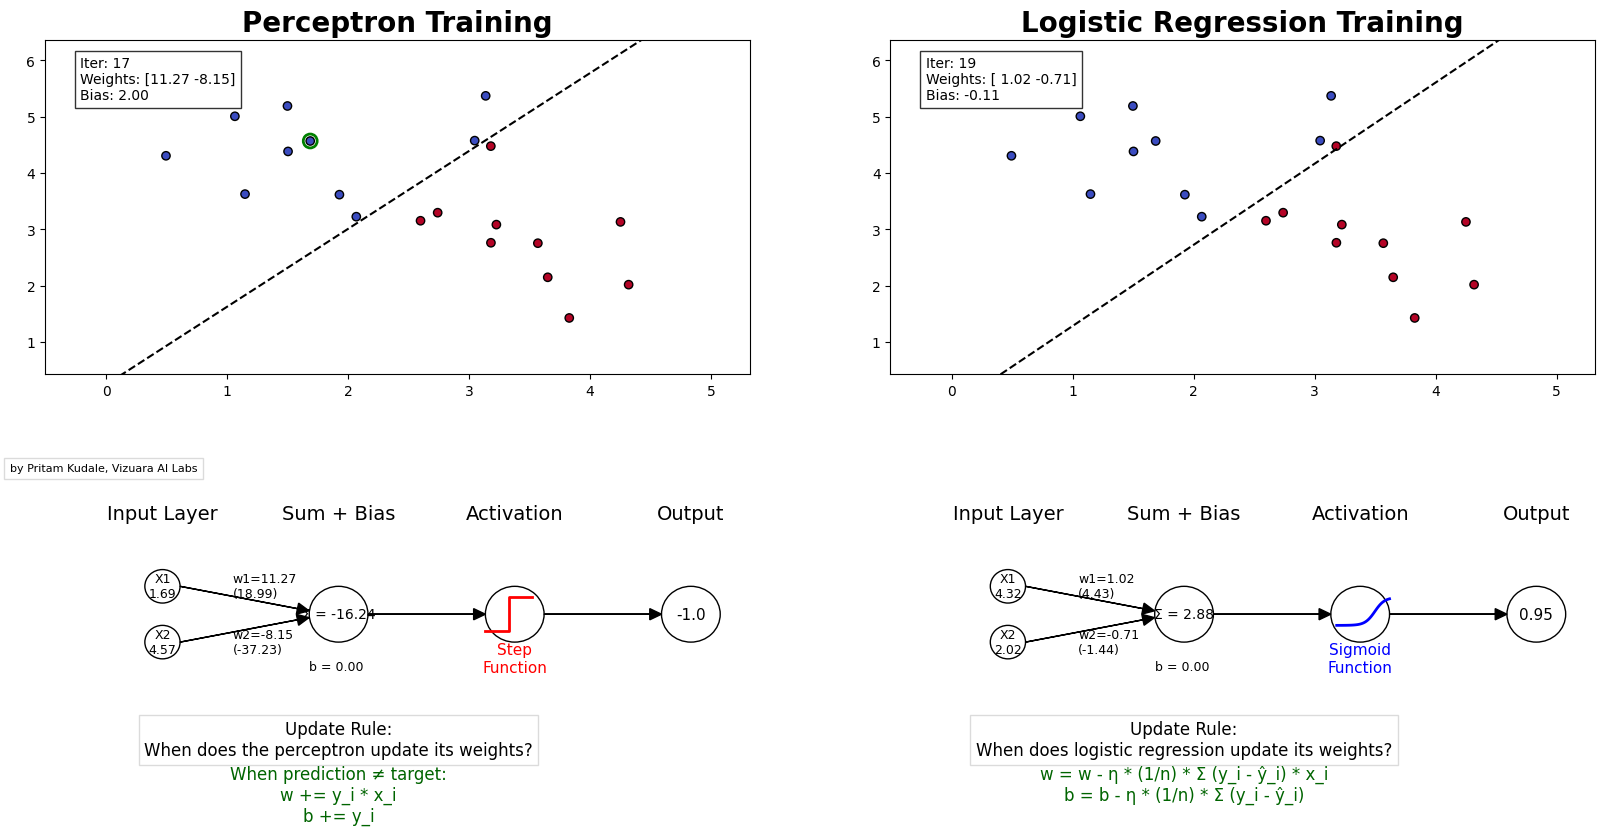

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from scipy.special import expit

# Generate common dataset
X, y = make_blobs(n_samples=20, centers=2, n_features=2,
                  center_box=(0, 5), cluster_std=0.8, random_state=42)
y_perceptron = np.where(y == 0, -1, 1)
y_logistic = np.where(y == 0, 0, 1)

# --- Perceptron Training ---
w_p = np.zeros(2)
b_p = 0
history_p = []

converged = False
iteration = 0
while not converged:
    converged = True
    for i in range(len(X)):
        xi, yi = X[i], y_perceptron[i]
        prediction = np.sign(np.dot(w_p, xi) + b_p)
        if prediction != yi:
            w_p += yi * xi
            b_p += yi
            history_p.append({
                'weights': w_p.copy(),
                'bias': b_p,
                'point': xi.copy(),
                'iteration': iteration
            })
            converged = False
            iteration += 1

# --- Logistic Regression Training ---
# Initialize parameters with horizontal decision boundary
w_l = np.array([1.0, 0.0])  # Initial horizontal decision boundary (w[1] = 0)
b_l = 0
learning_rate = 0.1
history_l = []

for iteration in range(20):
    z = np.dot(X, w_l) + b_l
    predictions = expit(z)
    errors = predictions - y_logistic
    dw = np.dot(X.T, errors) / len(X)
    db = np.mean(errors)
    w_l -= learning_rate * dw
    b_l -= learning_rate * db
    history_l.append({
        'weights': w_l.copy(),
        'bias': b_l,
        'predictions': predictions.copy(),
        'iteration': iteration
    })

# Create combined figure
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.2)

def setup_network(ax, activation_type):
    ax.axis([0, 12, 0, 6])
    ax.axis('off')

    # Nodes
    input_nodes = [plt.Circle((2, 4-i), 0.3, fc='white', ec='black') for i in range(2)]
    sum_node = plt.Circle((5, 3.5), 0.5, fc='white', ec='black')
    activation_node = plt.Circle((8, 3.5), 0.5, fc='white', ec='black')
    output_node = plt.Circle((11, 3.5), 0.5, fc='white', ec='black')

    # Add nodes
    [ax.add_patch(node) for node in input_nodes]
    ax.add_patch(sum_node)
    ax.add_patch(activation_node)
    ax.add_patch(output_node)

    # Labels
    ax.text(2, 5.2, "Input Layer", ha='center', fontsize=14)
    ax.text(5, 5.2, "Sum + Bias", ha='center', fontsize=14)
    ax.text(8, 5.2, "Activation", ha='center', fontsize=14)
    ax.text(11, 5.2, "Output", ha='center', fontsize=14)

    # Arrows
    ax.arrow(2.3, 4, 2, -0.4, head_width=0.2, head_length=0.2, fc='k')
    ax.arrow(2.3, 3, 2, 0.4, head_width=0.2, head_length=0.2, fc='k')
    ax.arrow(5.5, 3.5, 1.8, 0, head_width=0.2, head_length=0.2, fc='k')
    ax.arrow(8.5, 3.5, 1.8, 0, head_width=0.2, head_length=0.2, fc='k')


    # Activation symbols inside the circle
    if activation_type == "Step":
        ax.plot([7.5, 7.9, 7.9, 8.3], [3.2, 3.2, 3.8, 3.8], 'r-', lw=2)
        ax.text(8, 2.7, "Step\nFunction", ha='center', va='center', fontsize=11, color='r')
    else:
        x_sig = np.linspace(7.6, 8.5, 50)
        y_sig = expit((x_sig-8.25)*12)*0.5 + 3.3
        ax.plot(x_sig, y_sig, 'b-', lw=2)
        ax.text(8, 2.7, "Sigmoid\nFunction", ha='center', va='center', fontsize=11, color='b')

    # Dynamic elements
    ax.input_texts = [ax.text(2, 4-i, f'X{i+1}\n0.00', ha='center', va='center',
                             fontsize=9) for i in range(2)]
    ax.weight_labels = [ax.text(3.2, 4-i, f'w{i+1}=0.00', ha='left', va='center',
                               fontsize=9) for i in range(2)]
    ax.sum_text = ax.text(5, 3.5, 'Σ = 0.00', ha='center', va='center', fontsize=10)
    ax.activation_text = ax.text(8, 3.5, '', ha='center', va='center', fontsize=10)
    ax.output_text = ax.text(11, 3.5, '0.00', ha='center', va='center', fontsize=11)
    ax.bias_text = ax.text(4.5, 2.5, f'b = 0.00', fontsize=9)

# ---- Perceptron Column ----
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Perceptron Training", fontsize=20, weight='bold')
ax1.set_xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
ax1.set_ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
scatter_p = ax1.scatter(X[:, 0], X[:, 1], c=y_perceptron, cmap=plt.cm.coolwarm, edgecolors='k')
line_p, = ax1.plot([], [], 'k--')
highlight_p = ax1.scatter([], [], s=100, facecolors='none', edgecolors='g', linewidths=2)
text_p = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, va='top',
                 bbox=dict(facecolor='white', alpha=0.8))

ax2 = fig.add_subplot(gs[1, 0])
setup_network(ax2, "Step")

# ---- Logistic Regression Column ----
ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title("Logistic Regression Training", fontsize=20, weight='bold')
ax3.set_xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
ax3.set_ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
scatter_l = ax3.scatter(X[:, 0], X[:, 1], c=y_logistic, cmap=plt.cm.coolwarm, edgecolors='k')
line_l, = ax3.plot([], [], 'k--')
text_l = ax3.text(0.05, 0.95, '', transform=ax3.transAxes, va='top',
                 bbox=dict(facecolor='white', alpha=0.8))

ax4 = fig.add_subplot(gs[1, 1])
setup_network(ax4, "Sigmoid")

# Update rule perceptron elements
update_question = ax2.text(5, 1.6,
                          "Update Rule:\nWhen does the perceptron update its weights?",
                          ha='center', va='top', fontsize=12,
                          bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

update_answer = ax2.text(5, 0.8,
                        "When prediction ≠ target:\n"
                        "w += y_i * x_i\n"
                        "b += y_i",
                        ha='center', va='top', fontsize=12,
                        color='darkgreen', visible=False)

created = ax2.text(1, 6.2, "by Pritam Kudale, Vizuara AI Labs",
                        ha='center', va='top', fontsize=8,
                        bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

# Update rule elements for Logistic Regression
logistic_update_question = ax4.text(5, 1.6,
                                    "Update Rule:\nWhen does logistic regression update its weights?",
                                    ha='center', va='top', fontsize=12,
                                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

logistic_update_answer = ax4.text(5, 0.8,
                                  "w = w - η * (1/n) * Σ (y_i - ŷ_i) * x_i\n"
                                  "b = b - η * (1/n) * Σ (y_i - ŷ_i)",
                                  ha='center', va='top', fontsize=12,
                                  color='darkgreen', visible=False)


def init():
    line_p.set_data([], [])
    line_l.set_data([], [])
    highlight_p.set_offsets(np.empty((0, 2)))
    text_p.set_text('')
    text_l.set_text('')

    for ax in [ax2, ax4]:
        for i in range(2):
            ax.input_texts[i].set_text(f'X{i+1}\n0.00')
            ax.weight_labels[i].set_text(f'w{i+1}=0.00')
        ax.sum_text.set_text('Σ = 0.00')
        ax.output_text.set_text('0.00')
        ax.bias_text.set_text(f'b = 0.00')
        update_answer.set_visible(False)

    return (line_p, line_l, highlight_p, text_p, text_l,
            *ax2.input_texts, *ax2.weight_labels, ax2.sum_text, ax2.output_text, ax2.bias_text,
            *ax4.input_texts, *ax4.weight_labels, ax4.sum_text, ax4.output_text, ax4.bias_text)

def update(frame):
    # Perceptron updates
    current_p = history_p[min(frame, len(history_p)-1)]
    w_p, b_p = current_p['weights'], current_p['bias']
    x_p = np.array(ax1.get_xlim())
    y_p = (-w_p[0]*x_p - b_p)/w_p[1]
    line_p.set_data(x_p, y_p)
    highlight_p.set_offsets([current_p['point']])
    text_p.set_text(f'Iter: {current_p["iteration"]}\nWeights: {w_p.round(2)}\nBias: {b_p:.2f}')

    # Update perceptron network
    X_sample_p = current_p['point']
    z_p = np.dot(w_p, X_sample_p) + b_p
    for i in range(2):
        ax2.input_texts[i].set_text(f'X{i+1}\n{X_sample_p[i]:.2f}')
        ax2.weight_labels[i].set_text(f'w{i+1}={w_p[i]:.2f}\n({w_p[i]*X_sample_p[i]:.2f})')
    ax2.sum_text.set_text(f'Σ = {z_p:.2f}')
    ax2.output_text.set_text(f'{np.sign(z_p)}')
    update_answer.set_visible(True)

    # Logistic regression updates
    current_l = history_l[min(frame, len(history_l)-1)]
    w_l, b_l = current_l['weights'], current_l['bias']
    x_l = np.array(ax3.get_xlim())
    y_l = (-w_l[0]*x_l - b_l)/w_l[1]
    line_l.set_data(x_l, y_l)
    text_l.set_text(f'Iter: {current_l["iteration"]}\nWeights: {w_l.round(2)}\nBias: {b_l:.2f}')

    # Update logistic network
    X_sample_l = X[frame % len(X)]
    z_l = np.dot(w_l, X_sample_l) + b_l
    output_l = expit(z_l)
    for i in range(2):
        ax4.input_texts[i].set_text(f'X{i+1}\n{X_sample_l[i]:.2f}')
        ax4.weight_labels[i].set_text(f'w{i+1}={w_l[i]:.2f}\n({w_l[i]*X_sample_l[i]:.2f})')
    ax4.sum_text.set_text(f'Σ = {z_l:.2f}')
    ax4.output_text.set_text(f'{output_l:.2f}')

    logistic_update_answer.set_visible(True)

    return (line_p, line_l, highlight_p, text_p, text_l,
            *ax2.input_texts, *ax2.weight_labels, ax2.sum_text, ax2.output_text, ax2.bias_text,
            *ax4.input_texts, *ax4.weight_labels, ax4.sum_text, ax4.output_text, ax4.bias_text)

# Create animation
ani = FuncAnimation(fig, update, frames=max(len(history_p), len(history_l)),
                    init_func=init, interval=500, blit=True)
ani.save('perceptron_logistic_animation.gif', writer='pillow', fps=2)

plt.tight_layout()
plt.show()